## 索引indexing

In [44]:
import torch
a = torch.rand(2, 2, 4, 4)
print(a)
a[0].shape

tensor([[[[0.2013, 0.9700, 0.8694, 0.0990],
          [0.0380, 0.3055, 0.7835, 0.2086],
          [0.5482, 0.3717, 0.0887, 0.0606],
          [0.1383, 0.6479, 0.8221, 0.7176]],

         [[0.7236, 0.7212, 0.1372, 0.9848],
          [0.3563, 0.1828, 0.2993, 0.3654],
          [0.2283, 0.6301, 0.7731, 0.9679],
          [0.4837, 0.5999, 0.4925, 0.6603]]],


        [[[0.4150, 0.5215, 0.1668, 0.6481],
          [0.3861, 0.4641, 0.5126, 0.3483],
          [0.0154, 0.3139, 0.9954, 0.2054],
          [0.2392, 0.0797, 0.3594, 0.0531]],

         [[0.1518, 0.3264, 0.0204, 0.1812],
          [0.4291, 0.0392, 0.9501, 0.1251],
          [0.8676, 0.2024, 0.8558, 0.7458],
          [0.6329, 0.8612, 0.9633, 0.2558]]]])


torch.Size([2, 4, 4])

In [45]:
a[0, 0].shape

torch.Size([4, 4])

In [46]:
a[0, 0, 2, 3]

tensor(0.0606)

- 索引片段 select first/last N

In [47]:
a[:1].shape

torch.Size([1, 2, 4, 4])

In [48]:
a[0:1, :1, :, :]

tensor([[[[0.2013, 0.9700, 0.8694, 0.0990],
          [0.0380, 0.3055, 0.7835, 0.2086],
          [0.5482, 0.3717, 0.0887, 0.0606],
          [0.1383, 0.6479, 0.8221, 0.7176]]]])

In [49]:
a[0:, :1, -1:, :] # -1指倒数第一个元素

tensor([[[[0.1383, 0.6479, 0.8221, 0.7176]]],


        [[[0.2392, 0.0797, 0.3594, 0.0531]]]])

- select by steps隔行采样

In [50]:
a[:, :, 0:4:2, :] # start:over:steps

tensor([[[[0.2013, 0.9700, 0.8694, 0.0990],
          [0.5482, 0.3717, 0.0887, 0.0606]],

         [[0.7236, 0.7212, 0.1372, 0.9848],
          [0.2283, 0.6301, 0.7731, 0.9679]]],


        [[[0.4150, 0.5215, 0.1668, 0.6481],
          [0.0154, 0.3139, 0.9954, 0.2054]],

         [[0.1518, 0.3264, 0.0204, 0.1812],
          [0.8676, 0.2024, 0.8558, 0.7458]]]])

- select by specific index 具体采样

In [55]:
a.index_select(2, torch.tensor([0,1])) # (dim, index)

tensor([[[[0.2013, 0.9700, 0.8694, 0.0990],
          [0.0380, 0.3055, 0.7835, 0.2086]],

         [[0.7236, 0.7212, 0.1372, 0.9848],
          [0.3563, 0.1828, 0.2993, 0.3654]]],


        [[[0.4150, 0.5215, 0.1668, 0.6481],
          [0.3861, 0.4641, 0.5126, 0.3483]],

         [[0.1518, 0.3264, 0.0204, 0.1812],
          [0.4291, 0.0392, 0.9501, 0.1251]]]])

- ...

In [59]:
print(a[0, ...].shape) # ...代表任意多的维度
print(a[0, 1, ...].shape)

torch.Size([2, 4, 4])
torch.Size([4, 4])


- select by mask 通过mask掩码索引

In [70]:
x = torch.randn(3, 4)
print(x)
mask = x.ge(0.5) # x中大于0.5的为true 创建掩码
print(mask)
torch.masked_select(x, mask) # 自动打平了。可惜可惜

tensor([[ 0.4141,  0.1601, -0.9957, -3.1140],
        [ 1.1501, -1.9154,  0.1807, -0.5990],
        [-0.1052,  0.4178, -1.1493, -1.7325]])
tensor([[False, False, False, False],
        [ True, False, False, False],
        [False, False, False, False]])


tensor([1.1501])

## Tensor维度变换
1. view/reshape 只要变换前后的size一致就行，无法还原，会丢失源数据特征
2. squeeze / unsqueeze 减少，增加维度
3. expand / repeat 维度扩展，复制
4. .t 转置
5. transpose 交换维度
6. permute 按照索引顺序交换维度
7. broadcasting 广播机制，不会拷贝数据

- reshape

In [76]:
a = torch.randn(1, 2, 3)
print(a)
a = a.reshape(1, 6)
print(a)
b = torch.randn(6, 1)
print(b)
b = b.reshape(a.shape)
print(b)

tensor([[[ 0.2127, -1.9976,  0.6954],
         [-0.1440,  0.1247, -0.3878]]])
tensor([[ 0.2127, -1.9976,  0.6954, -0.1440,  0.1247, -0.3878]])
tensor([[ 1.0285],
        [-1.4708],
        [ 0.3411],
        [ 1.1972],
        [-0.5129],
        [-2.8700]])
tensor([[ 1.0285, -1.4708,  0.3411,  1.1972, -0.5129, -2.8700]])


- unsqueeze / squeeze 增加，减少维度

In [93]:
print(a.shape)
print(a.unsqueeze(2).shape) # 注意插入的位置
print(a.unsqueeze(-3).shape)
# example 给图像通道维度插入bios偏置
b = torch.rand(32)
f = torch.rand(4, 32, 14, 14)
b = b.unsqueeze(0).unsqueeze(2).unsqueeze(3) 
# 再进行下面的维度扩展操作使shape一样就能相加了
b.shape

torch.Size([1, 6])
torch.Size([1, 6, 1])
torch.Size([1, 1, 6])


torch.Size([1, 32, 1, 1])

In [94]:
# squeeze维度删减
print(b.shape)
print(b.squeeze().shape)
print(b.squeeze(0).shape)

torch.Size([1, 32, 1, 1])
torch.Size([32])
torch.Size([32, 1, 1])


- expand / repeat 其中expand不主动复制数据，节省内存

In [108]:
print(b.shape) # 只有1的维度才能扩展
print(b.expand(4, 32, 14, 14).shape) # 维度必须一致
#b.expand(4, 33, 14, 14).shape
b.expand(-1, 32, 14, 14).shape # -1代表保持不变

# repead为拷贝的次数,会更改内存，无法使用原来的数据
b.repeat(4, 32, 14, 14).shape # 32*32=1024

torch.Size([1, 32, 1, 1])
torch.Size([4, 32, 14, 14])


torch.Size([4, 1024, 14, 14])

- .t 只能适用于dim=2

- transpose 交换维度

- permute 按照索引交换维度

In [113]:
print(b.transpose(1,3).shape)
b.permute(1, 3, 2, 0).shape # 都会打乱内存顺序，需要添加.contiguous()将内存整合

torch.Size([1, 1, 1, 32])


torch.Size([32, 1, 1, 1])

- broadcasting 广播机制——先扩充维度，再复制
- 从最后一个维度即最小维度开始匹配
1. $A=[4, 32, 14, 14];B=[1,32,1,1]=>[4,32,14,14]$
2. $A=[4, 32, 14, 14];B=[14,14]=>[1,1,14,14]=>[4,32,14,14] $
3. 不符合的$A=[4, 32, 14, 14];B=[2,32,14,14]$ 必须手动先给第0维扩充到4

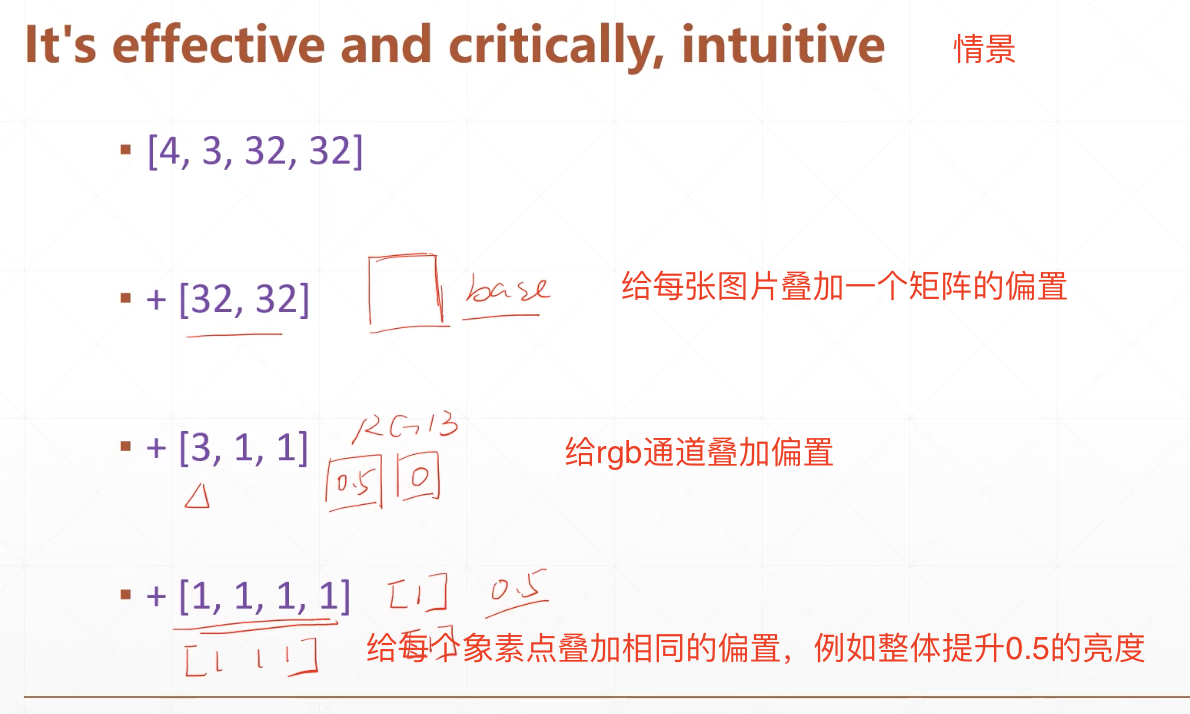

## Tensor合并切分
1. cat 合并
2. stack 合并
3. split 拆分
4. chunk 拆分

- cat 合并

In [116]:
a = torch.rand(4, 32, 8)
b = torch.rand(5, 32, 8)
torch.cat([a,b], dim=0).shape # [a,b]合并对象，dim=0根据指定维度合并

torch.Size([9, 32, 8])

- stack 合并

In [117]:
a1 = torch.rand(4, 3, 16, 32)
a2 = torch.rand(4, 3, 16, 32)
torch.cat([a1,a2], dim=2).shape

torch.Size([4, 3, 32, 32])

In [118]:
torch.stack([a1,a2], dim=2).shape # stack是插入一个维度来合并

torch.Size([4, 3, 2, 16, 32])

In [121]:
a = torch.rand(32, 8)
b = torch.rand(32, 8)
torch.stack([a,b], dim=0).shape # 对1班和2班的成绩单整合为一张

torch.Size([2, 32, 8])

- split 拆分 by len

In [129]:
c = torch.rand(3, 32, 8)
aa, bb = c.split([2,1], dim=0) # [2,1]分别按长度为2和1拆分为2个， dim=0从0维度
print(aa.shape, bb.shape)

torch.Size([2, 32, 8]) torch.Size([1, 32, 8])


- chunk 拆分 by num

In [134]:
aa, bb = c.split(2, dim=0)
print(aa.shape, bb.shape)
aa, bb = c.split(3, dim=0)
print(aa.shape, bb.shape)

torch.Size([2, 32, 8]) torch.Size([1, 32, 8])


ValueError: not enough values to unpack (expected 2, got 1)